In [7]:
import scipy

In [4]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

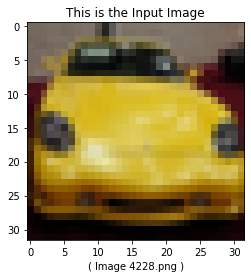


Most similar three images with similarity values are shown below for image ->  4228.png
4064.png  ->  0.5323864392604565


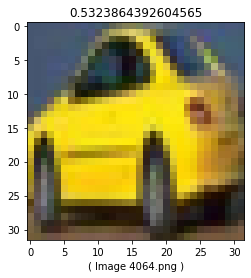

4162.png  ->  0.5085438401844858


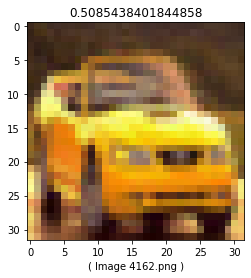

4766.png  ->  0.48797386074787436


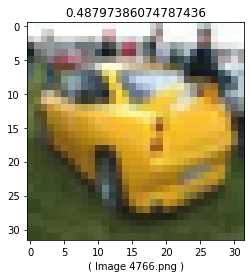

Results are plotted...



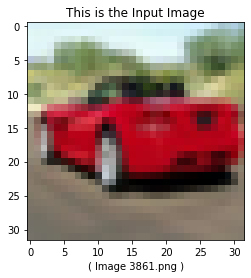


Most similar three images with similarity values are shown below for image ->  3861.png
3952.png  ->  0.5254856261893549


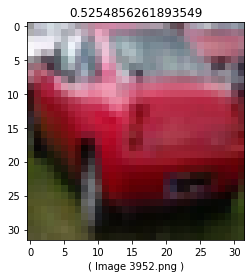

3819.png  ->  0.41488001833484817


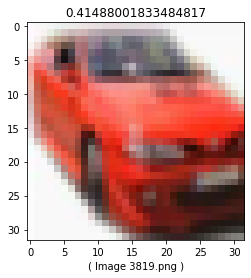

4124.png  ->  0.3521394954201086


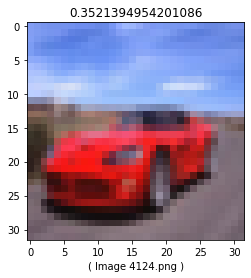

Results are plotted...



In [8]:
import numpy as np
import copy # for deep copying dictionary
from os import listdir
from PIL import Image
from numpy import linalg,dot # cosine_similarity helpers
import matplotlib.pyplot as plt

from scipy.stats import spearmanr
def spearman_corr(a,b):
    scores,_ = scipy.stats.spearmanr(a, b)

    return scores

def find_similarties(given_image_name):
    image_similarities = dict()
    for current_name in image_names:
        
        if current_name != given_image_name:
            
            current_image = image_vector_dictionary[current_name]
            given_image = image_vector_dictionary[given_image_name]
            
            similarity = spearman_corr(given_image, current_image)
            
            image_similarities[current_name] = similarity
            
            
    return image_similarities

def find_best_three(similarity_dictionary):
    temp_similarity = copy.deepcopy(similarity_dictionary)
    best_three = dict()
    for i in range(3):
        max_similar_name = max(temp_similarity, key=temp_similarity.get)
        
        best_three[max_similar_name] = temp_similarity.get(max_similar_name)
        
        del temp_similarity[max_similar_name]
    
    return best_three

def display_result(result_array,name):
    
    # plotting the input image
    plt.imshow(image_dictionary[name])
    plt.title('This is the Input Image')
    plt.xlabel("( Image "+ name + " )")
    plt.show()
    
    # plotting the best three , also printing them to console.
    print("\nMost similar three images with similarity values are shown below for image -> ",name)
    for key in result_array:
        print(key, ' -> ', result_array[key])
        plt.imshow(image_dictionary[key])
        plt.title(str(result_array[key]))
        plt.xlabel("( Image "+ key + " )")
        plt.show()
        
     
    print("Results are plotted...\n")
    
    return ""



def main():

    # Reading Images and converting them into vectors Part
    
    # getting the names of images in Car_Data Directory
    global image_names 
    image_names = [file for file in listdir('./Car_Data') if file.endswith('.png')]
    
    # reading images and storing them:
    # in image_dictionary like {'name' : [pixel matrices]}
    # in vector_dictionary like {'name' : [1D array]}
    global image_dictionary 
    image_dictionary = dict()
    global image_vector_dictionary 
    image_vector_dictionary = dict()
    
    for img_name in image_names:
        
        img = Image.open('./Car_Data/'+img_name) 
        
        image_dictionary[img_name] = img
        
        img_pixels = np.array(img).astype('float32').flatten()
        image_vector_dictionary[img_name] = img_pixels

    #----------------------------------------------------------------------
    
    # Test Part

    # test1
    similarities = find_similarties('4228.png')
    
    result = find_best_three(similarities)
    
    display_result(result,'4228.png')
    
    # test2
    similarities = find_similarties('3861.png')
    
    result = find_best_three(similarities)
    
    display_result(result,'3861.png')



if __name__ == "__main__":

    main()

